## Setup

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# load data
df_reviews = pd.read_csv("https://raw.githubusercontent.com/ada0110/practice-problems/main/df_reviews_sample.csv")

## Problem Statement
This is a sample data containing movie reviews from IMDB (we will learn later how to build a dataset like this).  Let's say we want to learn some ML model on this review data which can predict if a review is good, average or bad. In most ML models, it is required that we set the maximum length of review in terms of words or chars i.e. `max_sentence_length`. This allows the model to process multiple reviews at once in the form of a matrix `(num_reviews, max_sentence_length)`. So, after deciding the `max_sentence_length`, we pad or trim the reviews to make their length consistent.

In this problem, your task is to analyze what is the average and median number of word in reviews.

Bonus1: Plot the histogram distribution of review length.   
Bonus2: Sometimes average and median is not sufficient and we want to know lengths at other percentiles to make a more informed decision. Thus also calculate 90th, 95th and 99th percentile number of word in reviews.



In [66]:
df_reviews.head()

,movie,review,review_rating
0,I Know Who Killed Me,"I did not mind the movie, but I know who kille...",5/10
1,Dasvidaniya,Usually all of us make movie-watching decision...,10/10
2,The General,I would have eventually gotten around to watch...,7/10
3,Mandela,Outstanding Story and Screenplay. Kept at the ...,10/10
4,It's a Wonderful Life,I've always thought that the reason It's A Won...,10/10


## Solution

In [67]:
# x.split() will give us list of words in review: ["This", "is, "a", "good", "movie"]
df_reviews["review_length"] = df_reviews.review.apply(lambda x: len(x.split()))
df_reviews.head()

,movie,review,review_rating,review_length
0,I Know Who Killed Me,"I did not mind the movie, but I know who kille...",5/10,123
1,Dasvidaniya,Usually all of us make movie-watching decision...,10/10,675
2,The General,I would have eventually gotten around to watch...,7/10,601
3,Mandela,Outstanding Story and Screenplay. Kept at the ...,10/10,34
4,It's a Wonderful Life,I've always thought that the reason It's A Won...,10/10,571


In [68]:
df_reviews.agg(["mean", "median"])

,review_length
mean,281.49
median,198.50


If we want to process sentences in a different manner, like calculate length after removing `stop_words`, we can use a method to process the review and return length from it:  
`df_reviews["review_length"] = df_reviews.review.apply(lambda x: get_processed_sentence_length(x))`

### bonus 1

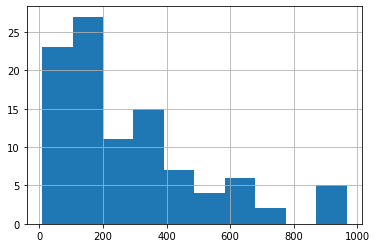

In [69]:
# we can use pd.plot(kind="hist") to plot the distribution of review length
# by default, it uses bins=10 
df_reviews.review_length.hist()

### bonus 2

In [70]:
# we can use quantile method to caluclate various k-th percentiles
# as we can see, 50th percentile is same as the median calculated above
df_reviews.review_length.quantile([0.5, .90, .95, 0.99])

0.50    198.50
0.90    602.20
0.95    768.75
0.99    958.08
Name: review_length, dtype: float64

**Note:** Even though median review length is ~200 words, this number goes becomes significantly large (600 words) if want to cover 90% of reviews. It might be possible that on a larger dataset, we don't see this much variation.
